## **Dataset: Adult - UCI Machine Learning Repository**

Link: https://archive.ics.uci.edu/dataset/2/adult

### **7- Apresentando Solução:**

- Para garantir que os algoritmos não sofreram overfitting, neste documento será realizado um novo teste com todos os modelos treinados anteriormente, porém nos testes ele serão submetidos por novos dados. O objetivo desse documento é extrair o quanto um algoritmo consegue classificar corretamente cada registro.

In [2]:
import pandas as pd
import pickle as pkl

#### **7.1 - Importando os modelos treinados:**

In [3]:
with open('model_random_forest.pkl', 'rb') as f:
    model_random_forest = pkl.load(f)

In [4]:
dataset = pd.read_csv("data/adult_test.csv")
dataset

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


#### **7.2 - Tratando os Dados:**

Com o objetivo de que os algoritmos consigam realizar as previsões, é essencial que os dados tenham os mesmo tratamento que utilizado nos dados de treinamento. Portanto, neste passo irei repetir o mesmo processo que realizei anteriormente.

In [6]:
dataset.columns = ["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [7]:
group_income = dataset.groupby(["income"]).size()
group_income

income
<=50K.    12435
>50K.      3846
dtype: int64

In [8]:
dataset.loc[dataset["workclass"] == ' ?', 'workclass'] = " Private"
dataset.loc[dataset["occupation"] == ' ?', 'occupation'] = " Prof-specialty"
dataset.loc[dataset["native-country"] == ' ?', 'native-country'] = " United-States"
dataset.loc[dataset["income"] == ' <=50K.', 'income'] = " <=50K"
dataset.loc[dataset["income"] == ' >50K.', 'income'] = " >50K"


- Vale uma observação que neste dataset foi encontrando nas classes um caracter "." acrecentado e por isso houve a necessidade de trata-lo.

#### **7.3 - Pré-processamento dos Dados:**

In [9]:
x_features = dataset.iloc[:, 0:14].values
y_class = dataset.iloc[:, 14].values

display(x_features, y_class)

array([[25, ' Private', 226802, ..., 0, 40, ' United-States'],
       [38, ' Private', 89814, ..., 0, 50, ' United-States'],
       [28, ' Local-gov', 336951, ..., 0, 40, ' United-States'],
       ...,
       [38, ' Private', 374983, ..., 0, 50, ' United-States'],
       [44, ' Private', 83891, ..., 0, 40, ' United-States'],
       [35, ' Self-emp-inc', 182148, ..., 0, 60, ' United-States']],
      shape=(16281, 14), dtype=object)

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      shape=(16281,), dtype=object)

In [10]:
# Ferramentas para Pré-Processamento

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

codificador_label = LabelEncoder()

for i in range(x_features.shape[1]):
    x_features[:,i] = codificador_label.fit_transform(x_features[:, i])

y_class = codificador_label.fit_transform(y_class)
padronizador = StandardScaler()
x_features = padronizador.fit_transform(x_features)
x_features

array([[-0.99434754, -0.09851079,  0.73008519, ..., -0.20395789,
        -0.02713725,  0.25775643],
       [-0.05534973, -0.09851079, -1.20715134, ..., -0.20395789,
         0.78953854,  0.25775643],
       [-0.77765574, -1.88752825,  1.44771264, ..., -0.20395789,
        -0.02713725,  0.25775643],
       ...,
       [-0.05534973, -0.09851079,  1.57809034, ..., -0.20395789,
         0.78953854,  0.25775643],
       [ 0.37803387, -0.09851079, -1.25391128, ..., -0.20395789,
        -0.02713725,  0.25775643],
       [-0.27204153,  0.79599794,  0.06691931, ..., -0.20395789,
         1.60621433,  0.25775643]], shape=(16281, 14))

In [11]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
x_features, y_class = tl.fit_resample(x_features, y_class)
x_features

array([[-0.99434754, -0.09851079,  0.73008519, ..., -0.20395789,
        -0.02713725,  0.25775643],
       [-0.05534973, -0.09851079, -1.20715134, ..., -0.20395789,
         0.78953854,  0.25775643],
       [-0.77765574, -1.88752825,  1.44771264, ..., -0.20395789,
        -0.02713725,  0.25775643],
       ...,
       [ 1.82264588, -0.09851079,  1.38197368, ..., -0.20395789,
        -0.02713725,  0.25775643],
       [ 0.37803387, -0.09851079, -1.25391128, ..., -0.20395789,
        -0.02713725,  0.25775643],
       [-0.27204153,  0.79599794,  0.06691931, ..., -0.20395789,
         1.60621433,  0.25775643]], shape=(15497, 14))

#### **7.4 - Realizando as Previsões e Avaliando:**

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn

def PerformanceMetrics(y_true, predict, class_name):
    # Imprime Matriz de Confusão:

    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9, )
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)

    # Imprime a Acurácia:

    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha diagonal (classificador aleatório)
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

roc_data = []

##### **7.4.6 -  Random Forest Classifier:**

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.04%.
O modelo identificou corretamente 10773 registros com o rótulo ' <=50K'.
O modelo identificou corretamente 2561 registros com o rótulo ' >50'.


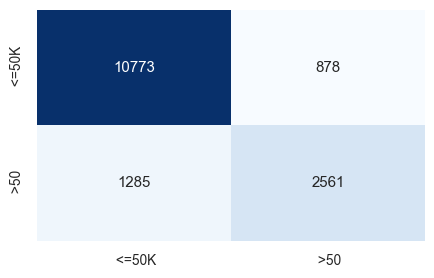

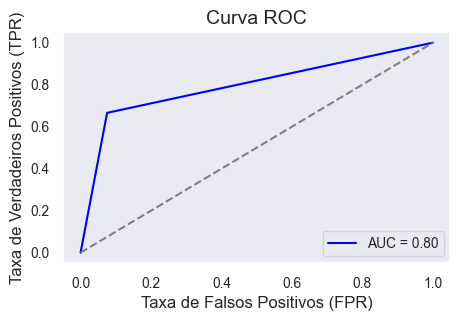

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12058
           1       0.67      0.74      0.70      3439

    accuracy                           0.86     15497
   macro avg       0.80      0.82      0.81     15497
weighted avg       0.87      0.86      0.86     15497



In [15]:
predict = model_random_forest.predict(x_features)
PerformanceMetrics(y_class, predict, [" <=50K", " >50"])
print(classification_report(predict, y_class))

## **Conclusão**

- O algoritmo **Random Forest** ofereceu um ótimo desempenho em classificar os registros, alcançando uma acurácia de 86%. Sobre as demais métricas:


**1. Precision:** Mede a proporção de Verdadeiros positivos entre as previsões realizadas como positivas.
- <=50k: 92%
- \>50K: 67%

**2. Recall:** Capacidade de um algoritmo classificar corretamente os verdadeiros positivos.
- <=50k: 89%
- \>50K: 74%

**3. F1-Score:** Média Harmonica entre "Precision" e "Recall".
- <=50k: 92%
- \>50K: 70%